In [2]:
!pip install torch torchvision matplotlib pillow deeplake ultralytics


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# 学習済みPoseモデルをロード
model = YOLO("yolo11n-pose.pt")  # YOLOv8のPoseモデル（軽量版）

In [ ]:
# 画像を読み込む
img_path = "2011tokyo_mister_fp-011-320x480.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

-1


0: 640x448 1 person, 826.1ms
Speed: 97.4ms preprocess, 826.1ms inference, 29.8ms postprocess per image at shape (1, 3, 640, 448)


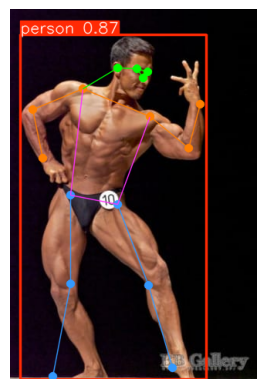

In [5]:
# 推定
results = model.predict(img)

# 結果を取得して描画
annotated_frame = results[0].plot()  # 関節が重ねて描画された画像

# 表示
plt.imshow(annotated_frame)
plt.axis("off")
plt.show()


Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-train



|

hub://activeloop/lsp-train loaded successfully.




0: 640x288 1 person, 138.9ms
Speed: 35.7ms preprocess, 138.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 288)


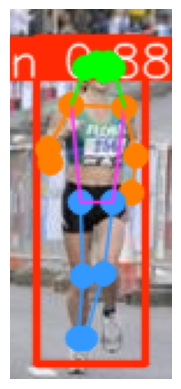

In [10]:
import deeplake

# LSP-trainデータセットをロード
train_ds = deeplake.load("hub://activeloop/lsp-train")

# 最初の画像を取得
img = train_ds.images[0].numpy()

# 推定
results = model.predict(img)

# 表示
annotated_img = results[0].plot()
plt.imshow(annotated_img)
plt.axis("off")
plt.show()



0: 640x288 1 person, 151.2ms
Speed: 17.6ms preprocess, 151.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 288)

0: 640x480 1 person, 247.7ms
Speed: 3.9ms preprocess, 247.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

0: 640x576 2 persons, 174.4ms
Speed: 8.2ms preprocess, 174.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 576)

0: 640x352 1 person, 138.1ms
Speed: 7.3ms preprocess, 138.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)

0: 640x384 4 persons, 146.0ms
Speed: 5.7ms preprocess, 146.0ms inference, 66.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x512 3 persons, 166.3ms
Speed: 3.2ms preprocess, 166.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)

0: 640x640 (no detections), 194.0ms
Speed: 5.5ms preprocess, 194.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x544 2 persons, 283.1ms
Speed: 6.7ms preprocess, 283.1ms inference, 1.2ms postprocess

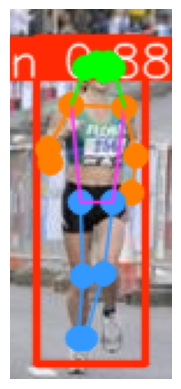

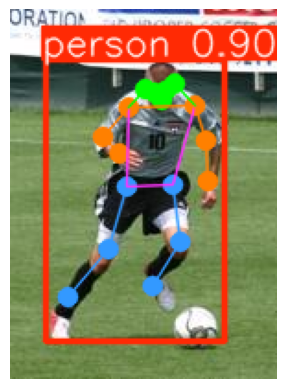

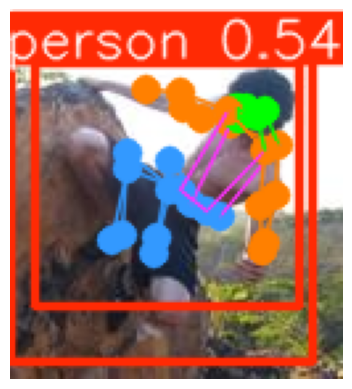

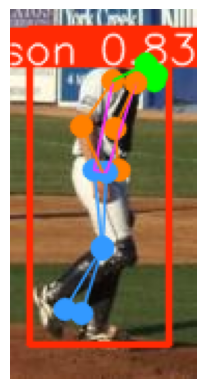

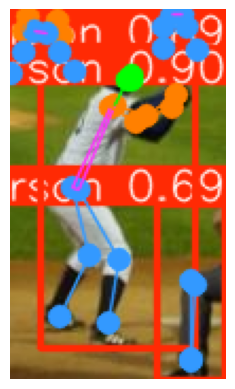

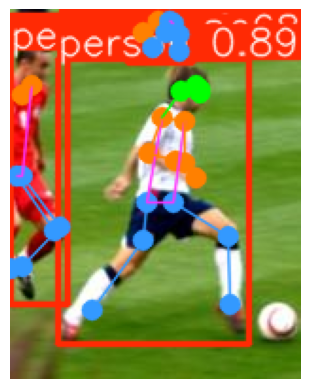

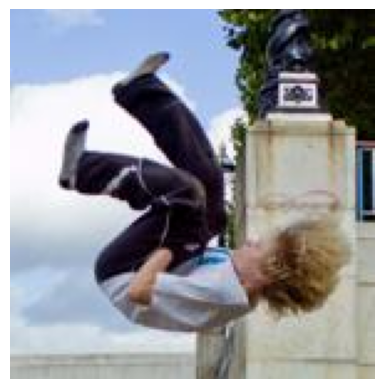

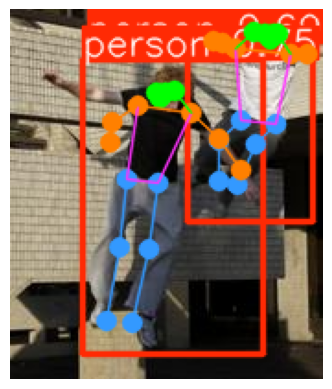

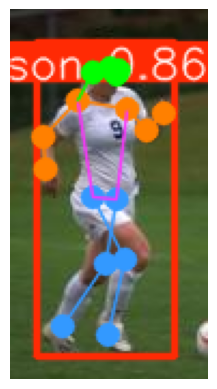

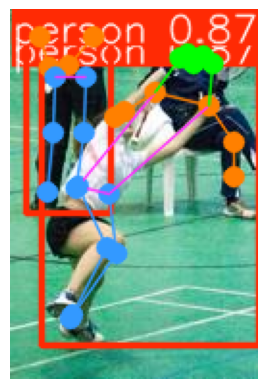

In [11]:
for i in range(10):  # 最初の10枚
    img = train_ds.images[i].numpy()
    results = model.predict(img)
    annotated_img = results[0].plot()
    plt.figure()
    plt.imshow(annotated_img)
    plt.axis("off")
plt.show()
